In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers import Input,Dense
from keras.models import Model,Sequential
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train,_), (X_test,_)=mnist.load_data()

In [3]:
X_train=X_train.astype('float32')/float(X_train.max())
X_test=X_test.astype('float32')/float(X_test.max())

In [4]:
print("Training set : ",X_train.shape)
print("Testing set : ",X_test.shape)

Training set :  (60000, 28, 28)
Testing set :  (10000, 28, 28)


In [5]:
# Reshaping our images into matrices
X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
print("Training set : ",X_train.shape) #The resolution has changed
print("Testing set : ",X_test.shape)

Training set :  (60000, 784)
Testing set :  (10000, 784)


In [6]:
input_dim=X_train.shape[1]
encoding_dim=32
compression_factor=float(input_dim/encoding_dim)
 
autoencoder=Sequential()
autoencoder.add(Dense(encoding_dim, input_shape=(input_dim,),activation='relu'))
autoencoder.add(Dense(input_dim,activation='sigmoid'))
 
input_img=Input(shape=(input_dim,))
encoder_layer=autoencoder.layers[0]
encoder=Model(input_img,encoder_layer(input_img))
 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train,X_train,epochs=50, batch_size=256, shuffle=True, validation_data=(X_test,X_test))

W0722 15:35:55.508080 140135687452480 deprecation_wrapper.py:119] From /home/deep/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 15:35:55.552881 140135687452480 deprecation_wrapper.py:119] From /home/deep/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 15:35:55.564037 140135687452480 deprecation_wrapper.py:119] From /home/deep/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 15:35:55.616487 140135687452480 deprecation_wrapper.py:119] From /home/deep/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 15:35:55.659392 140135

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.2780 - val_loss: 0.1922
Epoch 2/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1728 - val_loss: 0.1549
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1454 - val_loss: 0.1348
Epoch 4/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1290 - val_loss: 0.1213
Epoch 5/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.1179 - val_loss: 0.1122
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1105 - val_loss: 0.1062
Epoch 7/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.1054 - val_loss: 0.1019
Epoch 8/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1017 - val_loss: 0.0990
Epoch 9/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.0992 - val_loss: 0.0967
Epo

In [32]:
import cv2 
import numpy as np


# creating a 600 x 600 pixels canvas for mouse drawing
canvas = np.ones((600,600), dtype="uint8") * 255
# designating a 400 x 400 pixels point of interest on which digits will be drawn
canvas[100:500,100:500] = 0

start_point = None
end_point = None
is_drawing = False

def draw_line(img,start_at,end_at):
    cv2.line(img,start_at,end_at,255,15)

def on_mouse_events(event,x,y,flags,params):
    global start_point
    global end_point
    global canvas
    global is_drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        if is_drawing:
            start_point = (x,y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            end_point = (x,y)
            draw_line(canvas,start_point,end_point)
            start_point = end_point
    elif event == cv2.EVENT_LBUTTONUP:
        is_drawing = False


cv2.namedWindow("Test Canvas")
cv2.setMouseCallback("Test Canvas", on_mouse_events)


while(True):
    cv2.imshow("Test Canvas", canvas)
    key = cv2.waitKey(1) & 0xFF 
    if key == ord('q'):
        break
    elif key == ord('s'):
        is_drawing = True
    elif key == ord('c'):
        canvas[100:500,100:500] = 0
    elif key == ord('p'):
        image = canvas[100:500,100:500]
        input = cv2.resize(image, (28 , 28)).reshape((28 , 28,1)).astype('float32') / 255
        test_case=np.array([input])
cv2.destroyAllWindows()

In [33]:
image.shape,test_case.shape

((400, 400), (1, 28, 28, 1))

In [34]:
test_case=test_case.reshape((len(test_case),np.prod(test_case.shape[1:])))

In [35]:
encoded=encoder.predict(test_case)
decoder=autoencoder.predict(test_case)

In [36]:
test_case.shape


(1, 784)

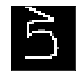

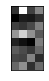

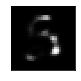

In [37]:
plt.figure(figsize=(18,4))
   #plot input image
ax=plt.subplot(3,1,1)
plt.imshow(test_case.reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()
# plot encoded image
ax = plt.subplot(3, 1, 1)
plt.imshow(encoded.reshape(8, 4))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()
     # plot reconstructed image
ax = plt.subplot(3, 1,1)
plt.imshow(decoder.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()